In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
insurance_data='insurance.csv'
df=pd.read_csv(insurance_data)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [3]:
df1=df.dropna()
df1['region']=df1['region'].str.lower()
FEMALE = 'female'
MALE = 'male'
sex_map= {'F':FEMALE, 'woman':FEMALE, 'man':MALE, 'M':MALE}
df1['sex']=df1['sex'].replace(sex_map)
df1['smoker']=(df1['smoker'] == 'yes')
df1['charges']=df1['charges'].str.strip('$').astype('float64')
insu_pos=df1.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)
insu_pos.sample(10)

C:\Users\anasp\AppData\Local\Temp\ipykernel_15728\2693678672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['region']=df1['region'].str.lower()
C:\Users\anasp\AppData\Local\Temp\ipykernel_15728\2693678672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sex']=df1['sex'].replace(sex_map)
C:\Users\anasp\AppData\Local\Temp\ipykernel_15728\2693678672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,age,sex,bmi,children,smoker,region,charges
492,18.0,female,25.080,0.0,False,northeast,2196.47320
199,64.0,female,39.330,0.0,False,northeast,14901.51670
773,19.0,female,28.880,0.0,True,northwest,17748.50620
395,46.0,male,19.855,0.0,False,northwest,7526.70645
324,29.0,male,27.200,0.0,False,southwest,2866.09100
582,39.0,male,45.430,2.0,False,southeast,6356.27070
299,48.0,female,28.880,1.0,False,northwest,9249.49520
248,19.0,male,20.900,1.0,False,southwest,1832.09400
635,64.0,male,38.190,0.0,False,northeast,14410.93210
84,37.0,female,34.800,2.0,True,southwest,39836.51900


In [7]:
df2 = insu_pos.copy()

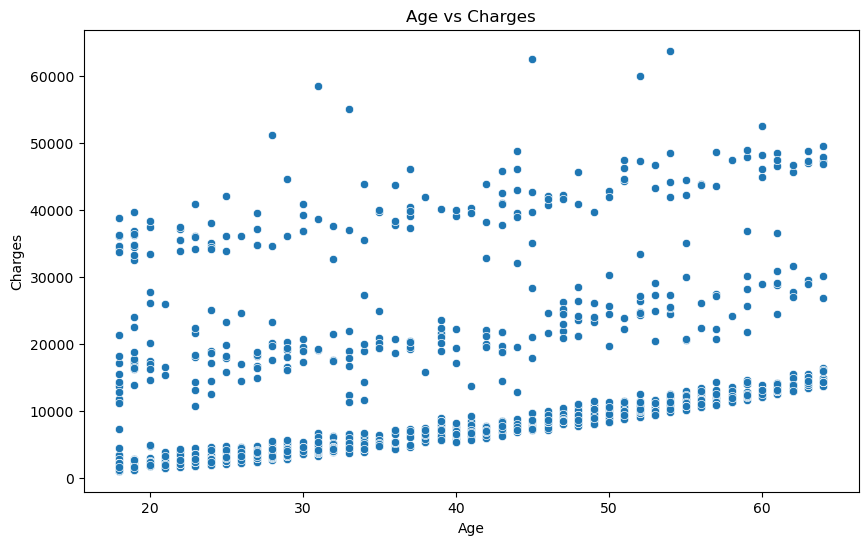

In [11]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='age', y='charges', data=df2)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

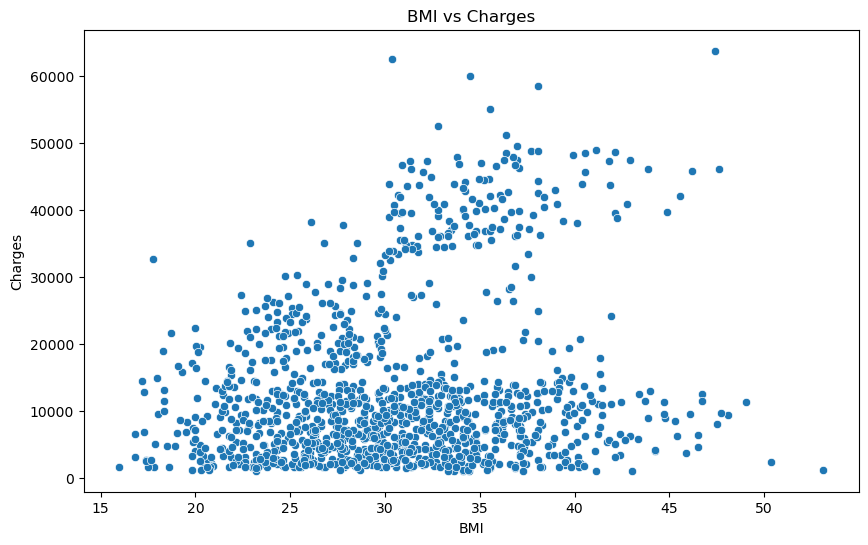

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df2)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


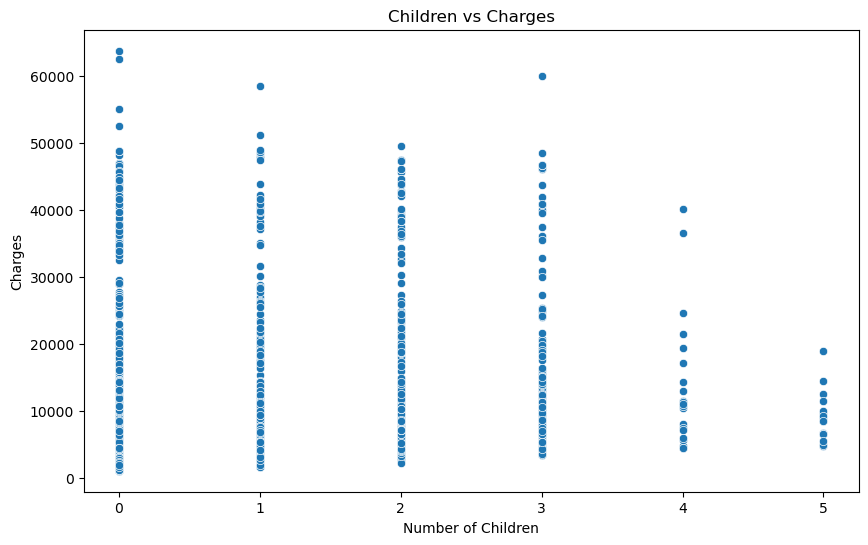

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='children', y='charges', data=df2)
plt.title('Children vs Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()


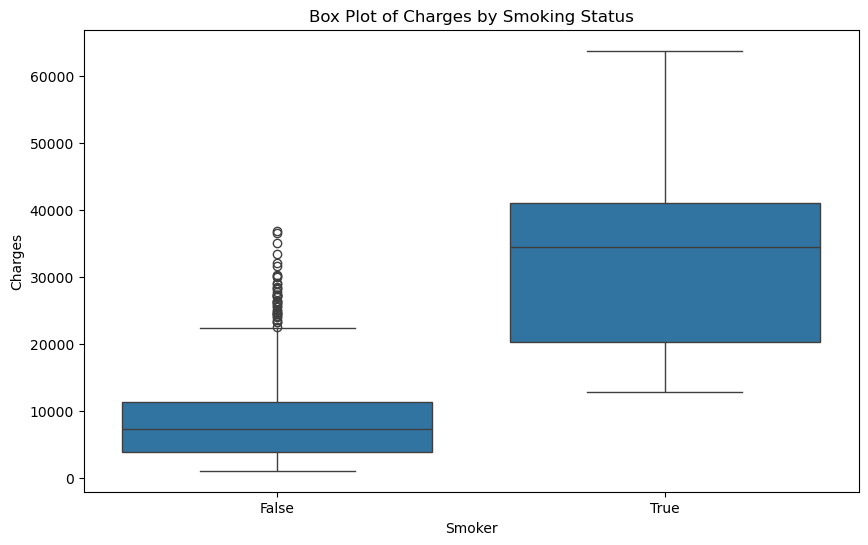

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df2)
plt.title('Box Plot of Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


C:\Users\anasp\AppData\Local\Temp\ipykernel_15728\1938493544.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='charges', data=df2, ci=None)


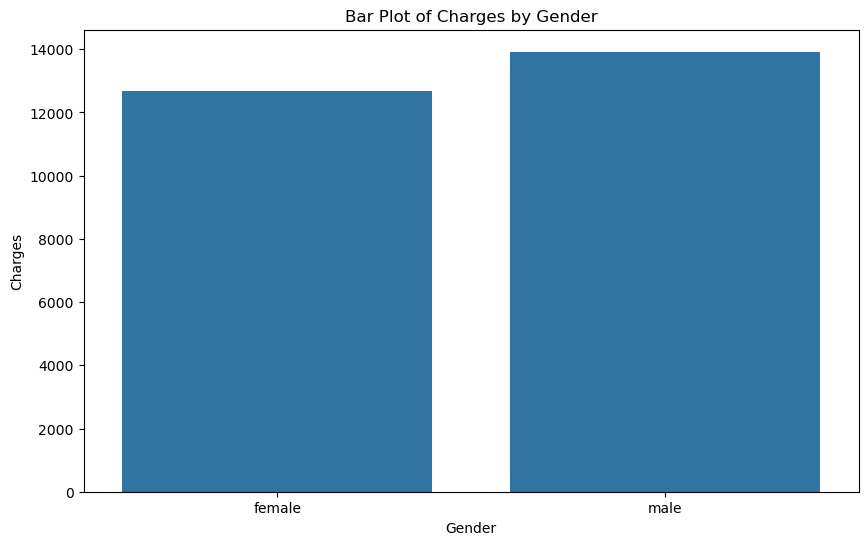

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='charges', data=df2, ci=None)
plt.title('Bar Plot of Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()


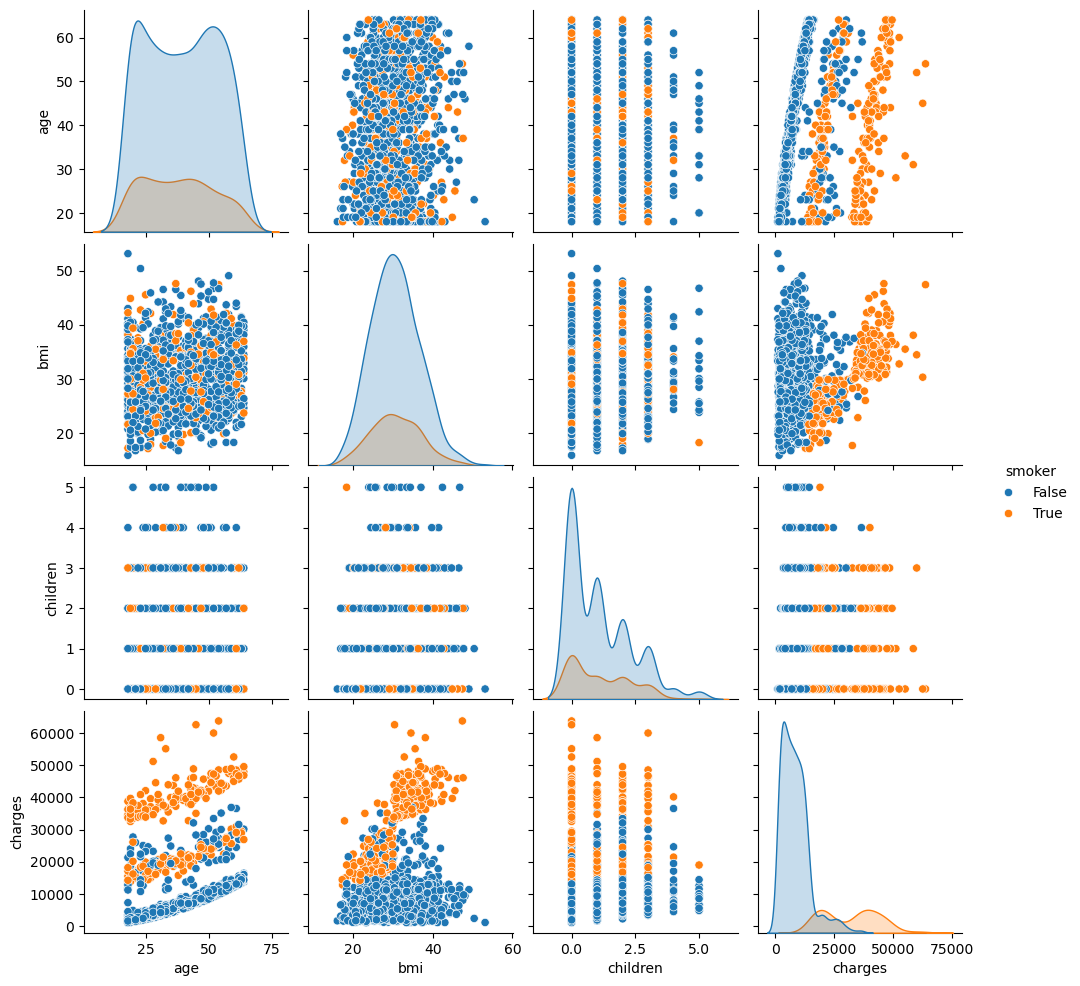

In [29]:
sns.pairplot(df2, hue='smoker')
plt.show()


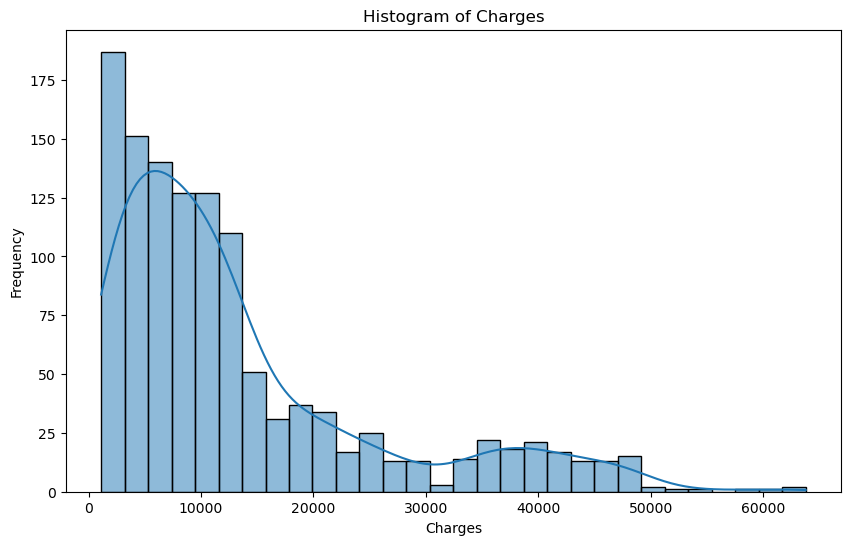

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['charges'], bins=30, kde=True)
plt.title('Histogram of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


In [44]:

df_new = pd.get_dummies(df2, prefix=['region'], columns=['region'])
df_new = df_new.drop(columns=['region_southeast'])

df_new['smoker'] = df_new['smoker'].astype('int64')

df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
df_new = df_new.drop(columns=['sex'])

df_new = df_new.dropna()
df_new.head()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,False,False,True,0
1,18.0,33.770,1.0,0,1725.55230,False,False,False,1
2,28.0,33.000,3.0,0,4449.46200,False,False,False,1
3,33.0,22.705,0.0,0,21984.47061,False,True,False,1
4,32.0,28.880,0.0,0,3866.85520,False,True,False,1


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score    

# Define input and output variables
X = df_new.drop(columns=['charges'])
y = df_new['charges']

print(df_new.info())
print(y.info())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R squared score
r2_score = r2_score(y_test, y_pred)

# Output the mean squared error
r2_score

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1207 non-null   float64
 1   bmi               1207 non-null   float64
 2   children          1207 non-null   float64
 3   smoker            1207 non-null   int64  
 4   charges           1207 non-null   float64
 5   region_northeast  1207 non-null   bool   
 6   region_northwest  1207 non-null   bool   
 7   region_southwest  1207 non-null   bool   
 8   is_male           1207 non-null   int64  
dtypes: bool(3), float64(4), int64(2)
memory usage: 69.5 KB
None
<class 'pandas.core.series.Series'>
Index: 1207 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1207 non-null   float64
dtypes: float64(1)
memory usage: 18.9 KB
None


0.7049323160872817

In [49]:
def preprocess_df(df):
    df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
    df_new = df_new.drop(columns=['region_southeast'])

    df_new['smoker'] = (df_new['smoker'] == 'yes')
    df_new['smoker'] = df_new['smoker'].astype('int64')

    df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
    df_new = df_new.drop(columns=['sex'])
    
    return df_new

In [51]:
# Implement model creation and training here
# Use as many cells as you need

# Task #5, see how model performs on validation dataset
# Subtask - Create helper function to preprocess dataframe

val_df = pd.read_csv('validation_dataset.csv')
input_df = preprocess_df(val_df)

predictions = model.predict(input_df)

validation_data = val_df.copy()

validation_data['predicted_charges'] = predictions

validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

validation_data.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
